<a href="https://colab.research.google.com/github/Azay961/Learning/blob/main/simple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
path = "https://www.statlearning.com/s/Advertising.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## scatter plot of the data


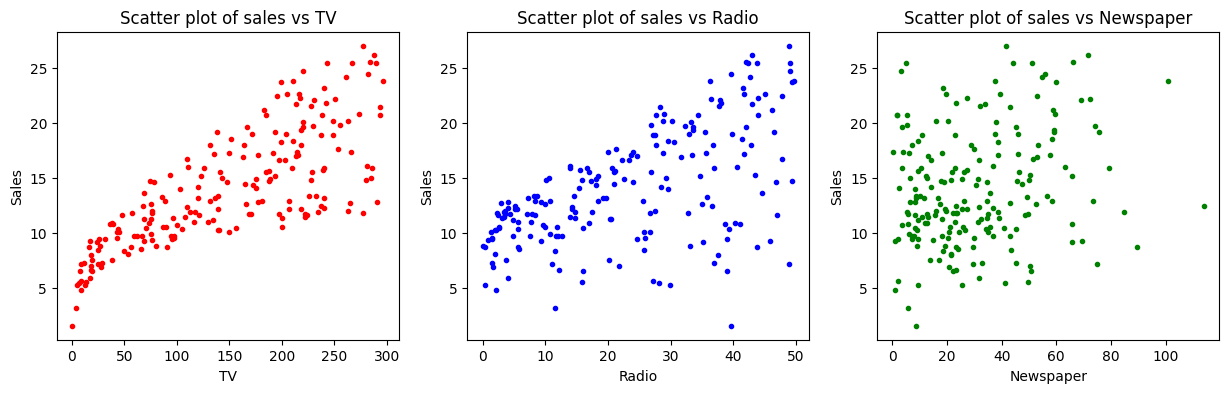

In [19]:
fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(1, 3)

# scatter plot of tv vs sales
ax1 = fig.add_subplot(gs[0])
ax1.scatter(df['TV'], df['sales'], color='red', marker='.')
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')
ax1.set_title("Scatter plot of sales vs TV")

# plot of sales vs radio
ax2 = fig.add_subplot(gs[1])
ax2.scatter(df['radio'], df['sales'], color='blue', marker='.')
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')
ax2.set_title("Scatter plot of sales vs Radio")

# plot of sales vs newspaper
ax3 = fig.add_subplot(gs[2])
ax3.scatter(df['newspaper'], df['sales'], color='green', marker='.')
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales')
ax3.set_title("Scatter plot of sales vs Newspaper")

plt.show()

# Simple linear regression with scikit-learn

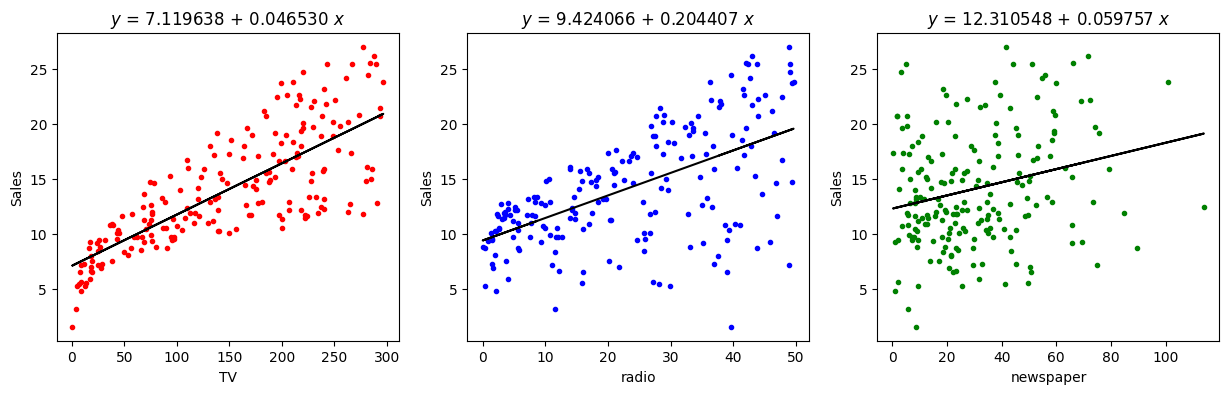

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

fig = plt.figure(figsize=(15,4))
gs = plt.GridSpec(1,3)

def plot_model(df, feature, color, ax):
  X = df[feature].values.reshape(-1,1)
  y = df['sales'].values

  # split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # train the model
  model =LinearRegression()
  model.fit(X_train, y_train)

  # Retrieve intercept b0 and slope b1
  b0 = model.intercept_
  b1 = model.coef_[0]

  # plot the regression line
  ax.scatter(X, y, color=color, marker='.')
  ax.plot(X, model.predict(X), color='black')
  ax.set_xlabel(feature)
  ax.set_ylabel('Sales')
  ax.set_title("$y$ = %3f + %3f $x$" %(b0, b1))


ax0 = fig.add_subplot(gs[0])
plot_model(df, 'TV', 'red', ax0)

ax1 = fig.add_subplot(gs[1])
plot_model(df, 'radio', 'blue', ax1)

ax2 = fig.add_subplot(gs[2])
plot_model(df, 'newspaper', 'green', ax2)

## simple linear regression with ordinary Least Squares

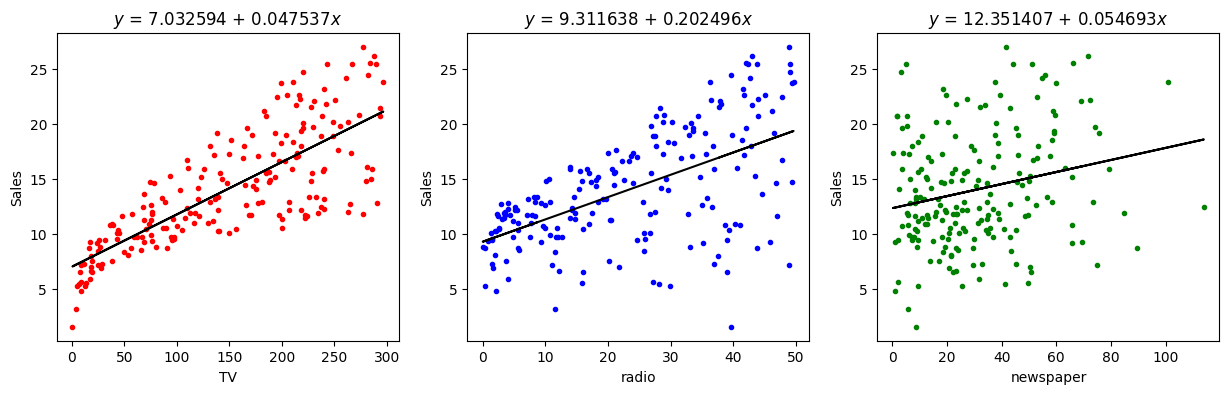

In [20]:
fig = plt.figure(figsize=(15,4))
gs = plt.GridSpec(1, 3)

def train_plot(df, feature, color, ax):
    X = df[feature].values.reshape(-1, 1)
    y = df['sales'].values

    x_mean= np.mean(X)
    y_mean= np.mean(y)

    n = len(X)

    numerator = 0
    denominator = 0

    for i in range(n):
        numerator += (X[i] - x_mean) * (y[i] - y_mean)
        denominator += (X[i] - x_mean) ** 2

    b1 = numerator / denominator
    b0 = y_mean - (b1 * x_mean)
    y_hat = b0 + np.dot(X,b1)

  # plot the regression line
    ax.scatter(df[feature], df['sales'], color=color, marker='.')
    ax.plot(X, y_hat, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel('Sales')
    ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))

ax0 = fig.add_subplot(gs[0])
train_plot(df, 'TV', 'red', ax0)

ax1 = fig.add_subplot(gs[1])
train_plot(df, 'radio', 'blue', ax1)

ax2 = fig.add_subplot(gs[2])
train_plot(df, 'newspaper', 'green', ax2)

# observation

After performing simple linear regression in all 3 scatter plots

__TV vs Sales__

TV is the input variable, one of the advertising mediums and sales is the output variable. Parameters estimated from OLS has done pretty good work in fitting the data points. The intercept ( β0 ) has been estimated as  7.03  and slope ( β1 ) has been estimated as  0.04 . The values of the parameters through OLS are the same to that through Scikit-Learn. The first plot depicts the simple linear regression with input as TV and output as sales.

__radio vs sales__

radio is the input variable, one of the advertising medium and sales is output variabe. Parameters estimated from OLS has done pretty good work in fitting the data points. The data intercept ( β0 ) has been estimated 9.31 and slope ( β1 ) has been estimated 0.20 . The values of the parameters through OLS are the same to that through Scikit-Learn.The second plot depicts the simple linear regression with input as radio and output as sales.

__newspaper vs. sales__

newspaper is the input variable, which is one of the advertising mediums, and sales is the output variable. Parameters estimated from OLS has done pretty good work in fitting the data points. The intercept ( β0 ) has been estimated as  12.35  and slope ( β1 ) has been estimated as  0.05 . The values of the parameters through OLS is the same as that through Scikit-Learn.The third plot depicts the simple linear regression with input as newspaper and output as sales.


In [10]:
!git clone https://github.com/Azay961/Learning.git

Cloning into 'Learning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), done.


In [12]:
%cd Learning


/content/Learning


In [14]:
!git config --global user.email "ajay023.chaudhary.com"
!git config --global user.name "Azay961"

In [17]:
!git add .

In [18]:
!git commit -m "Add simple linear regression file"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
